In [4]:
import pandas as pd

In [10]:
from pathlib import Path
file_path = Path('resources') / 'Banglore_traffic_Dataset.csv'

In [ ]:
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    display(df.head())  # Show the first 5 rows
except FileNotFoundError:
    print("File not found. Please make sure the path is correct and the file exists.")
except Exception as e:
    print(f" An error occurred: {e}")

In [ ]:
print(df.info())

In [ ]:
print(df.tail())

In [15]:
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])

df['hour']= df['Date'].dt.hour

df['weekday']= df['Date'].dt.weekday

df['month']= df['Date'].dt.month

In [ ]:
print(df.head())

In [24]:
from pathlib import Path
file_path = Path('resources') / 'my_updated_traffic_data_hour.csv'

In [25]:
import matplotlib.pyplot as plt 

In [ ]:
traffic_by_hour = df.groupby('hour')['Traffic Volume'].mean()

plt.figure(figsize=(8,6))

plt.plot(traffic_by_hour.index, traffic_by_hour.values, marker='o')
plt.show()

In [ ]:
plt.title('Average traffic volume by hour')
plt.xlabel('Hour of the day')
plt.ylabel('Average traffic volume')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(df['Traffic Volume'], bins=25, color='pink', edgecolor='red')
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [37]:
plt.savefig('Traffic_Volume_Distribution.png')
plt.show()

<Figure size 640x480 with 0 Axes>

In [36]:
import pandas as pd
import random
df = pd.read_csv('my_updated_traffic_data_hour.csv')
def random_time():
    hour = random.randint(0,23)
    minute = random.randint(0,59)
    second = random.randint(0,59)
    return f'{hour:02d}:{minute:02d}:{second:02d}'
df['random_time'] = [random_time() for _ in range(len(df))]
df['datetime'] = df['Date'] +' '+ df['random_time']
df.to_csv('traffic_with_random_time.csv', index=False)

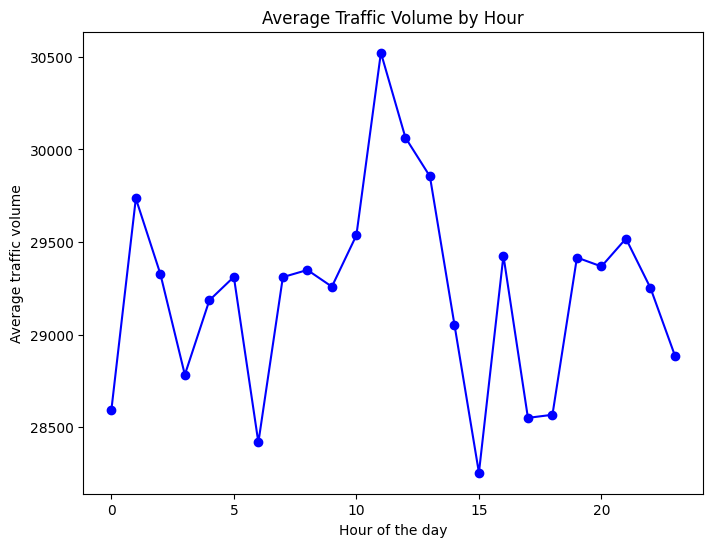

In [37]:
import pandas as pd
df = pd.read_csv('traffic_with_random_hour.csv')
import matplotlib.pyplot as plt
traffic_by_hour = df.groupby('Hour')['Traffic Volume'].mean()

plt.figure(figsize=(8,6))

plt.plot(traffic_by_hour.index, traffic_by_hour.values, marker='o', color='blue')
plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour of the day')
plt.ylabel('Average traffic volume')
plt.grid(False)
plt.show()

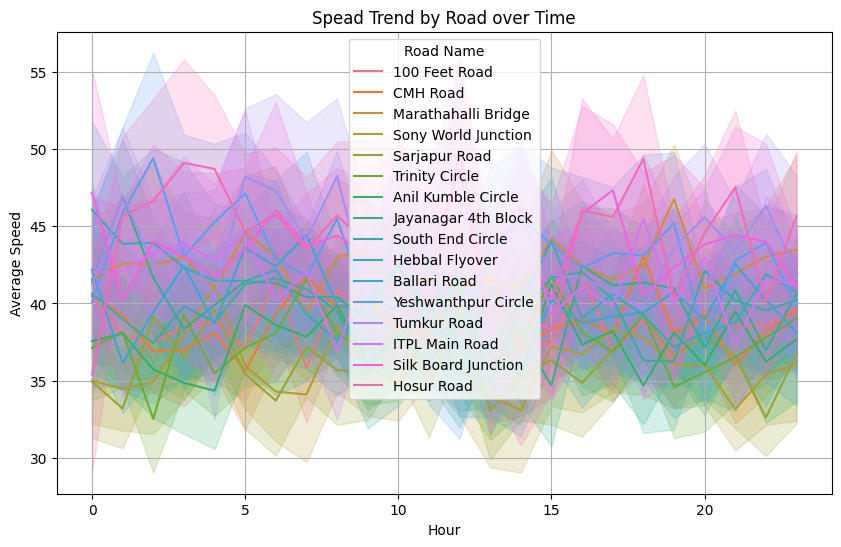

In [38]:
import pandas as pd
df = pd.read_csv('traffic_with_random_hour.csv')
df.groupby('Road Name')['Average Speed'].mean().sort_values(ascending=False)
df.groupby('Road Name')['Travel Time Index'].mean().sort_values()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x = 'Hour', y = 'Average Speed', hue = 'Road Name')
plt.title("Spead Trend by Road over Time")
plt.grid(True)
plt.show()

In [39]:
best_road = df[df['Hour'] == 8].groupby('Road Name')['Travel Time Index'].mean().sort_values()
print(best_road)


Road Name
Tumkur Road            1.223799
Yeshwanthpur Circle    1.223870
Hosur Road             1.233339
Silk Board Junction    1.234277
ITPL Main Road         1.319533
Marathahalli Bridge    1.329230
CMH Road               1.363346
South End Circle       1.368934
Jayanagar 4th Block    1.382079
Ballari Road           1.405975
100 Feet Road          1.407697
Hebbal Flyover         1.435431
Anil Kumble Circle     1.436172
Trinity Circle         1.468414
Sony World Junction    1.490021
Sarjapur Road          1.495122
Name: Travel Time Index, dtype: float64
